## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

#library for shuffling the dataset
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [3]:
col_names = ['Center','Left','Right','Steering','Throttle','Break','Speed']
df = pd.read_csv("D:\ARNAV\Jupyter notebook\Autonomus Cars My Codes\AV Simulation\driving_log.csv", names = col_names)

In [4]:
df.head()

,Center,Left,Right,Steering,Throttle,Break,Speed
0,D:\ARNAV\Jupyter notebook\Autonomus Cars My Co...,D:\ARNAV\Jupyter notebook\Autonomus Cars My C...,D:\ARNAV\Jupyter notebook\Autonomus Cars My C...,0.0,0.0,0.0,0.000085
1,D:\ARNAV\Jupyter notebook\Autonomus Cars My Co...,D:\ARNAV\Jupyter notebook\Autonomus Cars My C...,D:\ARNAV\Jupyter notebook\Autonomus Cars My C...,0.0,0.0,0.0,0.000078
2,D:\ARNAV\Jupyter notebook\Autonomus Cars My Co...,D:\ARNAV\Jupyter notebook\Autonomus Cars My C...,D:\ARNAV\Jupyter notebook\Autonomus Cars My C...,0.0,0.0,0.0,0.000078
3,D:\ARNAV\Jupyter notebook\Autonomus Cars My Co...,D:\ARNAV\Jupyter notebook\Autonomus Cars My C...,D:\ARNAV\Jupyter notebook\Autonomus Cars My C...,0.0,0.0,0.0,0.000080
4,D:\ARNAV\Jupyter notebook\Autonomus Cars My Co...,D:\ARNAV\Jupyter notebook\Autonomus Cars My C...,D:\ARNAV\Jupyter notebook\Autonomus Cars My C...,0.0,0.0,0.0,0.000078


In [18]:
center = df.iloc[:,0:1].values
center_y = df.iloc[:,3:4].values

left = df.iloc[:,1:2].values
left_y = df.iloc[:,3:4].values + 0.2

right = df.iloc[:,2:3].values
right_y = df.iloc[:,3:4].values - 0.2

In [19]:
X = np.concatenate((center,left,right),axis = 0)
y = np.concatenate((center_y,left_y,right_y),axis = 0)

In [20]:
X.shape

(22842, 1)

In [30]:
y.shape

(22842, 1)

In [96]:
data = np.concatenate((X,y), axis = 1)
print(data)
print("\n")
print(type(data))

[['D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\center_2022_03_13_10_59_55_808.jpg'
  0.0]
 ['D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\center_2022_03_13_10_59_55_908.jpg'
  0.0]
 ['D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\center_2022_03_13_10_59_56_010.jpg'
  0.0]
 ...
 [' D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\right_2022_03_13_11_15_14_236.jpg'
  -0.2]
 [' D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\right_2022_03_13_11_15_14_338.jpg'
  -0.2]
 [' D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\right_2022_03_13_11_15_14_439.jpg'
  -0.2]]


<class 'numpy.ndarray'>


In [97]:
data = pd.DataFrame(data,columns=["Images","Steering"])
data

,Images,Steering
0,D:\ARNAV\Jupyter notebook\Autonomus Cars My Co...,0.0
1,D:\ARNAV\Jupyter notebook\Autonomus Cars My Co...,0.0
2,D:\ARNAV\Jupyter notebook\Autonomus Cars My Co...,0.0
3,D:\ARNAV\Jupyter notebook\Autonomus Cars My Co...,0.0
4,D:\ARNAV\Jupyter notebook\Autonomus Cars My Co...,0.0
...,...,...
22837,D:\ARNAV\Jupyter notebook\Autonomus Cars My C...,-0.2
22838,D:\ARNAV\Jupyter notebook\Autonomus Cars My C...,-0.2
22839,D:\ARNAV\Jupyter notebook\Autonomus Cars My C...,-0.2
22840,D:\ARNAV\Jupyter notebook\Autonomus Cars My C...,-0.2


In [98]:
def balanceData(data,samplesPerBin,display=True):
    nBin = 31
    hist, bins = np.histogram(data['Steering'], nBin)
    if display:
        center = (bins[:-1] + bins[1:]) * 0.5
        plt.bar(center, hist, width=0.06)
        plt.plot((np.min(data['Steering']), np.max(data['Steering'])), (samplesPerBin, samplesPerBin))
        plt.show()

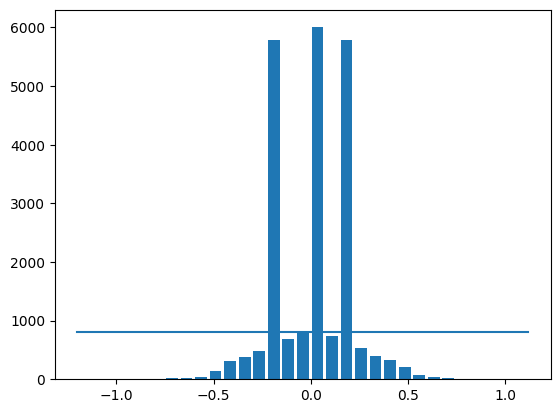

In [100]:
balanceData(data,800)

In [101]:
new_data = data

In [102]:
def removeData(data,samplesPerBin):
    nBin = 31
    hist, bins = np.histogram(data['Steering'], nBin)
    removeindexList = []
    for j in range(nBin):
        binDataList = []
        for i in range(len(data['Steering'])):
            if data['Steering'][i] >= bins[j] and data['Steering'][i] <= bins[j + 1]:
                binDataList.append(i)
        binDataList = shuffle(binDataList)
        binDataList = binDataList[samplesPerBin:]
        removeindexList.extend(binDataList)

    print('Removed Images:', len(removeindexList))
    data.drop(data.index[removeindexList], inplace=True)
    print('Remaining Images:', len(data))

In [103]:
removeData(new_data,800)

Removed Images: 15188
Remaining Images: 7654


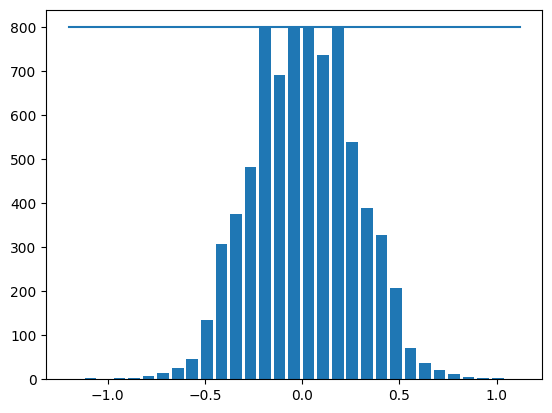

In [104]:
balanceData(new_data,800)

In [106]:
Steering = new_data['Steering'].values
imgs = new_data['Images'].values

In [107]:
positive = 0
negative = 0
zero = 0


for i in Steering:
    
    if (i > 0):
        positive += 1
    elif (i < 0):
        negative += 1
    elif (i == 0):
        zero += 1
        
print('Positive Steering Values: ',positive)
print('Negative Steering Values: ',negative)
print('Zeros Steering Values: ',zero)

Positive Steering Values:  3262
Negative Steering Values:  3699
Zeros Steering Values:  693


### Saving the Dataset as NumPy

In [110]:
new_data = new_data.values

In [113]:
imgs = []
steering = []

for i in range(len(new_data)):
    imgs.append(new_data[i][0].lstrip())
    steering.append(new_data[i][1])

In [114]:
final_data = [imgs, steering]
final_data = np.array(final_data)
final_data

array([['D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\center_2022_03_13_10_59_57_034.jpg',
        'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\center_2022_03_13_10_59_57_139.jpg',
        'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\center_2022_03_13_10_59_57_447.jpg',
        ...,
        'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\right_2022_03_13_11_15_12_563.jpg',
        'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\right_2022_03_13_11_15_12_879.jpg',
        'D:\\ARNAV\\Jupyter notebook\\Autonomus Cars My Codes\\AV Simulation\\IMG\\right_2022_03_13_11_15_14_136.jpg'],
       ['-0.2803755', '-0.04787249', '-0.01542867', ...,
        '-0.43437800000000004', '-0.2', '-0.2']], dtype='<U102')

In [115]:
np.save("Preprocessed_Balanced_data", final_data)